# Estimating the Start and Stop of Motion
In this notebook we show how to detect the start and stop of the probe using the 
accelerometer data. 


In [11]:
# Import the function to read the data 
from study_lyte.io import read_csv 

# Import the function to the events
from study_lyte.detect import get_acceleration_start, get_acceleration_stop

# Impor plotting functions
import matplotlib.pyplot as plt 

# Open the file 
df, meta = read_csv("./data/acceleration_example.csv")

# Rolling mean to smooth out the signal
df = df.rolling(window=100).mean()

## Raw Data
Below is the raw NIR profile. In it you can see lag time before the probe enters the snow this can make interpretation difficult.
A good starting place is to trim the data only to when the probe is moving. 

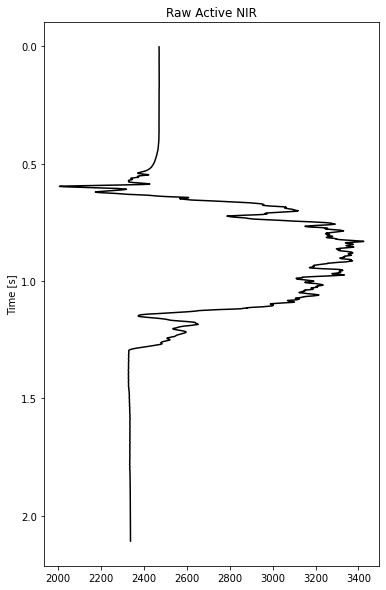

In [12]:
# Plot up the raw stuff
fig, ax = plt.subplots(figsize=(6,10))
ax.plot(df['Sensor3'], df['time'], color='k')
ax.set_title("Raw Active NIR")
ax.set_ylabel('Time [s]')
a = ax.invert_yaxis()


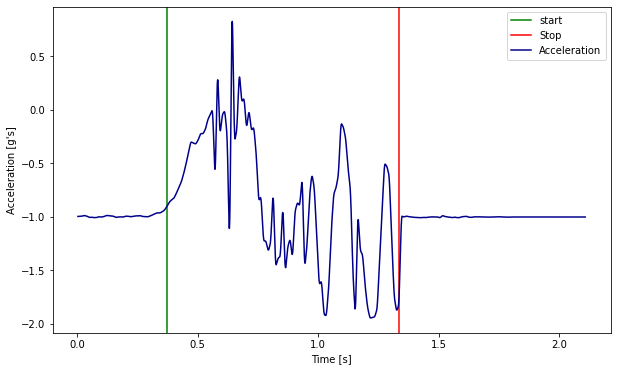

In [15]:
n_points = 200
start_threshold = 0.1
stop_threshold = 0.8

# Use simple thresholds to get the start and stop of the signals
start = get_acceleration_start(df['acceleration'], n_points_for_basis=n_points, threshold=start_threshold)
stop = get_acceleration_stop(df['acceleration'], n_points_for_basis=n_points, threshold=stop_threshold)

# Plot the acceleration with starts and stops
fig, ax = plt.subplots(figsize=(10, 6), ncols=1)
ax.axvline(df['time'].iloc[start], -2,2, color='green', label='start')
ax.axvline(df['time'].iloc[stop], -2,2, color='red', label='Stop')
ax.set_ylabel("Acceleration [g's]")
ax.set_xlabel("Time [s]")
ax.plot(df['time'], df['acceleration'], color='darkblue', label='Acceleration')
a = ax.legend()


Index(['time', 'Sensor3', 'acceleration'], dtype='object')


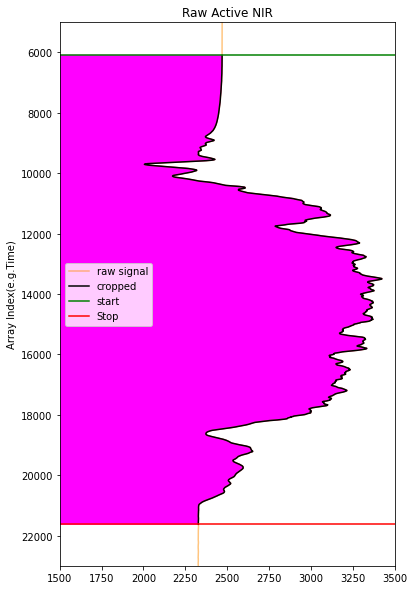

In [16]:
# Plot up the raw stuff
fig, ax = plt.subplots(figsize=(6,10))
print(df.columns)
cropped = df.iloc[start:stop]

ax.plot(df['Sensor3'], df.index, color='darkorange', alpha=0.5, label='raw signal')
ax.fill_betweenx(df.index[start:stop], df['Sensor3'].iloc[start:stop], color='magenta')

ax.plot(cropped['Sensor3'], cropped.index, color='black', label='cropped')
ax.axhline(start, color='green', label='start')
ax.axhline(stop, color='red', label='Stop')

ax.set_title("Raw Active NIR")
ax.set_ylabel('Array Index(e.g.Time)')
ax.set_xlim(1500, 3500)
ax.set_ylim(5000, 23000)
ax.legend()
a = ax.invert_yaxis()


# 